In [61]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import trapz

from Assignment1 import x_test_filtered

# TRAINING DATASET

In [62]:
train_images_df = pd.read_csv('train_images.csv')
x_train = train_images_df.values
train_images_df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.341,0.342,0.343,0.344,0.345,0.346,0.347,0.348,0.349,0.350
0,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,22,...,0,0,0,0,133,167,73,0,0,0


In [63]:
train_labels_df = pd.read_csv('train_labels.csv')
y_train = train_labels_df.values.ravel()
train_labels_df.head()


,9
0,0
1,0
2,3
3,0
4,2


In [64]:
test_images_df = pd.read_csv('test_images.csv')
x_test = test_images_df.values
test_images_df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.507,0.508,0.509,0.510,0.511,0.512,0.513,0.514,0.515,0.516
0,0,0,0,0,0,0,0,0,0,0,...,2,3,0,3,174,189,67,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,164,58,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,21,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,2,0,1,1,0,0,0,...,71,12,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,145,129,62,0,0,0,0,0,0,0


In [65]:
test_labels_df = pd.read_csv('test_labels.csv')
y_test = test_labels_df.values.ravel()
test_labels_df.head()

,9
0,2
1,1
2,1
3,6
4,1


In [66]:
# Printing out the unique classes in our label files. Should match with below
print("Class distribution in training set: ", np.unique(y_train))
# Class distribution in training set:  [0 1 2 3 4 5 6 7 8 9]
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Class distribution in training set:  [0 1 2 3 4 5 6 7 8 9]


# Binarization – Select a threshold, ‘del’, to be 127: 

All pixel values less than ‘del’ are given value 0 
All pixel values greater than or equal to ‘del’ are given value 1 


In [88]:
# Threshold, 'del', to be 127
def binarize_images(images, threshold=127):
    # convert grayscale images 0-255 into binary, either 1 or 0
    return (images >= threshold).astype(int)

In [89]:
# Default binarization with threshold 127
x_train_bin = binarize_images(x_train)
print(f'Training Data Binarized: {x_train_bin}')
# print(f'First entry in binarized training data: {x_train_bin[1]}')
x_test_bin = binarize_images(x_test)
print(f'Testing Data Binarized: {x_test_bin}')

Training Data Binarized: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Testing Data Binarized: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [69]:
trouser_class = 1
pullover_class = 2

# Filter to only have trousers and pullovers
filtering_indices_train = np.where((y_train == trouser_class) | (y_train == pullover_class))
filtering_indices_test = np.where((y_test == trouser_class) | (y_test == pullover_class))

In [83]:
# Applying filter to images and labels data
x_train_filtered = x_train_bin[filtering_indices_train]
print(f'Images Filtered: {x_train_filtered}')
y_train_filtered = y_train[filtering_indices_train]
print(f'Labels Filtered: {y_train_filtered}')

x_test_filtered = x_test_bin[filtering_indices_test]
y_test_filtered = y_test[filtering_indices_test]

Images Filtered: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Labels Filtered: [2 2 1 ... 1 2 1]


In [84]:
# Printing to see what our data looks like now
print(f'Number of training samples (Trousers and Pullovers only): {len(x_train_filtered)}')
print(f'Number of testing samples (Trousers and Pullovers only): {len(x_test_filtered)}')
print(f'Classes in filtered training set: {np.unique(y_train_filtered)}')
print(f'Line above means that only Trousers(1) and Pullovers(2) are in the dataset')

Number of training samples (Trousers and Pullovers only): 12000
Number of testing samples (Trousers and Pullovers only): 2000
Classes in filtered training set: [1 2]
Line above means that only Trousers(1) and Pullovers(2) are in the dataset


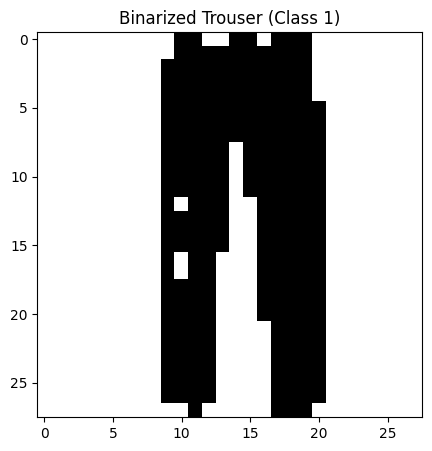

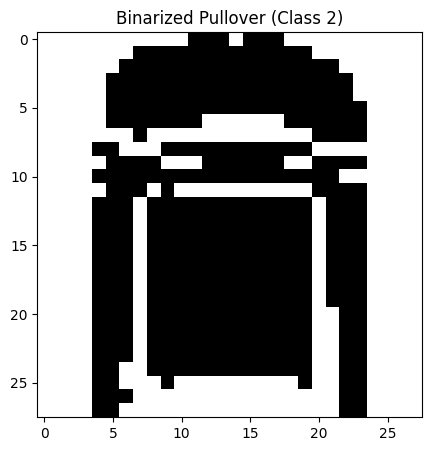

In [85]:
# Let's visualize one example of each class after filtering and binarization
trouser_idx = np.where(y_train_filtered == trouser_class)[0][0]
pullover_idx = np.where(y_train_filtered == pullover_class)[0][0]

def display_image(pixels, title):
    # Reshape the 784 pixels to 28x28 image
    img = pixels.reshape(28, 28)
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='binary')
    plt.title(title)
    plt.show()

display_image(x_train_filtered[trouser_idx], f'Binarized Trouser (Class {trouser_class})')
display_image(x_train_filtered[pullover_idx], f'Binarized Pullover (Class {pullover_class})')

# NAIVE BAYES CLASSIFICATION 


In [73]:
# Bayes' Theorem
# P(Y|X) = P(X | Y) * P(Y) / P(X)
# P(Y|X) = Probability the item is a trouser, given the pixel data
# P(Y) = probability of picking a trouser without looking
# P(X) = probability of seeing that pixel pattern in any image

# Need to look at how often each pixel is black or white in our training data
# will have to calculate probability of 1st pixel being black indicating a trouser
# then calculate all the other pixels being black == trouser?

In [103]:
# P(Y) Prior Probabilities
n_samples = len(x_train_filtered)
classes = np.unique(y_train_filtered)
n_classes = len(classes)

print(f'{n_samples} training samples, {n_classes} classes')

# let's calculate the prior for trouser
trouser_count = 0
pullover_count = 0

for i in range(n_samples):
    if y_train_filtered[i] == trouser_class:
        trouser_count += 1
    else:
        pullover_count += 1
        
# Calculating priors for each class
trouser_prior_prob = trouser_count / n_samples
pullover_prior_prob = pullover_count / n_samples

print(f'Trouser Prior Prob: {trouser_prior_prob}')
print(f'Pullover Prior Prob: {pullover_prior_prob}')

12000 training samples, 2 classes
Trouser Prior Prob: 0.5
Pullover Prior Prob: 0.5


In [111]:
num_features = len(x_train_filtered[0])

# initializing counters for feature occurrences
feature_count_class_1 = [0] * num_features
feature_count_class_2 = [0] * num_features

# Loop through every image
for i in range(len(x_train_filtered)):
    # loop through every pixel in each image
    for j in range(num_features):
        # @ this pixel, check what class the images is labeled
        if y_train_filtered[i] == trouser_class:
            #if it is a trouser, see if the image pixel is a 1
            # if 1, then it's a black pixel and we add to the 
            if x_train_filtered[i][j] == 1:
                feature_count_class_1[j] += 1
        else:
            if x_train_filtered[i][j] == 1:
                feature_count_class_2[j] += 1
                
print(f'Array of counts that indicate how many trouser images have each pixel set to 1: {feature_count_class_1[:10]}')
print(f'Array of counts that indicate how many pullover images have each pixel set to 1: {feature_count_class_2[:10]}')

Array of counts that indicate how many trouser images have each pixel set to 1: [0, 0, 0, 0, 2, 5, 21, 64, 161, 618]
Array of counts that indicate how many pullover images have each pixel set to 1: [0, 0, 0, 0, 1, 2, 5, 28, 131, 418]


In [112]:
# Calculate feature/pixel probabilities with Laplace smoothing: P(feature=1 | class)
p_feature_1_given_trouser = [] # P(feature=1 | Trouser)
p_feature_0_given_trouser = [] # P(feature=0 | Trouser)
p_feature_1_given_pullover = [] # P(feature=1 | Pullover)
p_feature_0_given_pullover = [] # P(feature=0 | Pullover)

In [118]:
for j in range(num_features):
    # P(feature=1|class=1) with Laplace smoothing
    prob_1_given_1 = (feature_count_class_1[j] + 1) / (trouser_count + 2)
    p_feature_1_given_trouser.append(prob_1_given_1)

    # P(feature=0|class=1) with Laplace smoothing
    prob_0_given_1 = 1 - prob_1_given_1
    p_feature_0_given_trouser.append(prob_0_given_1)

    # P(feature=1|class=2) with Laplace smoothing
    prob_1_given_2 = (feature_count_class_2[j] + 1) / (trouser_count + 2)
    p_feature_1_given_pullover.append(prob_1_given_2)

    # P(feature=0|class=2) with Laplace smoothing
    prob_0_given_2 = 1 - prob_1_given_2
    p_feature_0_given_pullover.append(prob_0_given_2)
    
print(f'P( Feature=1 | Trouser ) values: {p_feature_1_given_trouser}')

P( Feature=1 | Trouser ) values: [0.00016661112962345885, 0.00016661112962345885, 0.00016661112962345885, 0.00016661112962345885, 0.0004998333888703765, 0.000999666777740753, 0.0036654448517160947, 0.010829723425524825, 0.026991002999000334, 0.10313228923692103, 0.44268577140953014, 0.5633122292569144, 0.48767077640786405, 0.4643452182605798, 0.408863712095968, 0.45734755081639455, 0.4543485504831723, 0.47100966344551815, 0.3608797067644119, 0.07780739753415528, 0.016494501832722427, 0.006664445184938354, 0.0014995001666111296, 0.00016661112962345885, 0.00016661112962345885, 0.00016661112962345885, 0.00016661112962345885, 0.00016661112962345885, 0.00016661112962345885, 0.00016661112962345885, 0.00016661112962345885, 0.0003332222592469177, 0.0004998333888703765, 0.0028323892035988004, 0.009330223258913695, 0.019993335554815063, 0.05981339553482173, 0.25191602799066976, 0.813728757080973, 0.931022992335888, 0.9308563812062646, 0.9276907697434189, 0.923025658113962, 0.9010329890036655, 0.

In [131]:
import math
from sklearn.preprocessing import MinMaxScaler

# Since the P(Feature|Class) values are very small, we'll just log to 
# Make predictions on training set
print("Making predictions on training set")
y_train_filtered_pred = []
y_train_filtered_prob = []

for i in range(len(x_train_filtered)):
    # Calculate log probability for class 1 (Trouser)
    log_prob_class_1 = math.log(trouser_prior_prob)
    for j in range(num_features):
        feature_value = x_train_filtered[i][j]
        if feature_value == 1:
            log_prob_class_1 += math.log(p_feature_1_given_trouser[j])
        else:
            log_prob_class_1 += math.log(p_feature_0_given_trouser[j])

    # Calculate log probability for class 2 (Pullover)
    log_prob_class_2 = math.log(pullover_prior_prob)
    for j in range(num_features):
        feature_value = x_train_filtered[i][j]
        if feature_value == 1:
            log_prob_class_2 += math.log(p_feature_1_given_pullover[j])
        else:
            log_prob_class_2 += math.log(p_feature_0_given_pullover[j])

    # Convert log probabilities to actual probabilities
    # Subtract max for numerical stability
    max_log_prob = max(log_prob_class_1, log_prob_class_2)
    prob_class_1 = math.exp(log_prob_class_1 - max_log_prob)
    prob_class_2 = math.exp(log_prob_class_2 - max_log_prob)

    # Normalize probabilities
    sum_prob = prob_class_1 + prob_class_2
    prob_class_1 /= sum_prob
    prob_class_2 /= sum_prob

    # Store probabilities
    y_train_filtered_prob.append([prob_class_1, prob_class_2])

    # Make prediction
    if prob_class_1 > prob_class_2:
        y_train_filtered_pred.append(1)  # Trouser
    else:
        y_train_filtered_pred.append(2)  # Pullover
        
print(f'Probabilities for each class: {y_train_filtered_prob[:10]}')
print(f'Prediction training data output: {y_train_filtered_pred[:10]}')

Making predictions on training set
Probabilities for each class: [[1.0711568456474796e-255, 1.0], [0.0, 1.0], [1.0, 3.490276726089195e-70], [1.0, 4.603484706072895e-91], [1.328e-320, 1.0], [6.279393550676083e-20, 1.0], [1.0, 1.1765862391529009e-121], [3.110114292225007e-234, 1.0], [6.503127528075542e-279, 1.0], [1.0, 7.448737216257201e-48]]
Prediction training data output: [2, 2, 1, 1, 2, 2, 1, 2, 2, 1]


In [139]:
# Make predictions on test set
print("Making predictions on test set...")
y_test_filtered_pred = []
y_test_filtered_prob = []  # Probabilities for each class

for i in range(len(x_test_filtered)):
    # Calculate log probability for class 1 (Trouser)
    log_prob_class_1 = math.log(trouser_prior_prob)
    for j in range(num_features):
        feature_value = x_test_filtered[i][j]
        if feature_value == 1:
            log_prob_class_1 += math.log(p_feature_1_given_trouser[j])
        else:
            log_prob_class_1 += math.log(p_feature_0_given_trouser[j])

    # Calculate log probability for class 2 (Pullover)
    log_prob_class_2 = math.log(pullover_prior_prob)
    for j in range(num_features):
        feature_value = x_test_filtered[i][j]
        if feature_value == 1:
            log_prob_class_2 += math.log(p_feature_1_given_pullover[j])
        else:
            log_prob_class_2 += math.log(p_feature_0_given_pullover[j])

    # Convert log probabilities to actual probabilities
    # Subtract max for numerical stability
    max_log_prob = max(log_prob_class_1, log_prob_class_2)
    prob_class_1 = math.exp(log_prob_class_1 - max_log_prob)
    prob_class_2 = math.exp(log_prob_class_2 - max_log_prob)

    # Normalize probabilities
    sum_prob = prob_class_1 + prob_class_2
    prob_class_1 /= sum_prob
    prob_class_2 /= sum_prob

    # Store probabilities
    y_test_filtered_prob.append([prob_class_1, prob_class_2])

    # Make prediction
    if prob_class_1 > prob_class_2:
        y_test_filtered_pred.append(1)  # Trouser
    else:
        y_test_filtered_pred.append(2)  # Pullover

print(f'Prediction testing data output: {y_train_filtered_pred[:10]}')

Making predictions on test set...
Prediction testing data output: [2, 2, 1, 1, 2, 2, 1, 2, 2, 1]


In [140]:
# calculate training accuracy
train_correct = 0
for i in range(len(y_train_filtered)):
    if y_train_filtered[i] == y_train_filtered_pred[i]:
        train_correct += 1
train_accuracy = train_correct / len(y_train_filtered)

print(f'Training accuracy: {train_accuracy}')

# calculate test accuracy
test_correct = 0
for i in range(len(y_test_filtered)):
    if y_test_filtered[i] == y_test_filtered_pred[i]:
        test_correct += 1
test_accuracy = test_correct / len(y_test_filtered)

print(f'Test accuracy: {test_accuracy}')


Training accuracy: 0.9318333333333333
Test accuracy: 0.934


In [142]:
# Calculate class-wise metrics for both classes
class_names = {1: 'Trouser', 2: 'Pullover'}
for class_idx in [1, 2]:  # Class 1 = Trouser, Class 2 = Pullover
    # Training set metrics
    class_name = class_names[class_idx]

    # For training set
    train_tp = 0  # True positives
    train_fp = 0  # False positives
    train_tn = 0  # True negatives
    train_fn = 0  # False negatives

    for i in range(len(y_train_filtered)):
        if y_train_filtered[i] == class_idx and y_train_filtered_pred[i] == class_idx:
            train_tp += 1
        elif y_train_filtered[i] != class_idx and y_train_filtered_pred[i] == class_idx:
            train_fp += 1
        elif y_train_filtered[i] != class_idx and y_train_filtered_pred[i] != class_idx:
            train_tn += 1
        elif y_train_filtered[i] == class_idx and y_train_filtered_pred[i] != class_idx:
            train_fn += 1

    train_precision = train_tp / (train_tp + train_fp) if (train_tp + train_fp) > 0 else 0
    train_recall = train_tp / (train_tp + train_fn) if (train_tp + train_fn) > 0 else 0

    # For test set
    test_tp = 0  # True positives
    test_fp = 0  # False positives
    test_tn = 0  # True negatives
    test_fn = 0  # False negatives

    for i in range(len(y_test_filtered)):
        if y_test_filtered[i] == class_idx and y_test_filtered_pred[i] == class_idx:
            test_tp += 1
        elif y_test_filtered[i] != class_idx and y_test_filtered_pred[i] == class_idx:
            test_fp += 1
        elif y_test_filtered[i] != class_idx and y_test_filtered_pred[i] != class_idx:
            test_tn += 1
        elif y_test_filtered[i] == class_idx and y_test_filtered_pred[i] != class_idx:
            test_fn += 1

    test_precision = test_tp / (test_tp + test_fp) if (test_tp + test_fp) > 0 else 0
    test_recall = test_tp / (test_tp + test_fn) if (test_tp + test_fn) > 0 else 0

    print(f"\nClass: {class_name} (class {class_idx})")
    print(f"Training - Precision: {train_precision:.4f}, Recall: {train_recall:.4f}")
    print(f"Test - Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")


Class: Trouser (class 1)
Training - Precision: 0.9031, Recall: 0.9675
Test - Precision: 0.9094, Recall: 0.9640

Class: Pullover (class 2)
Training - Precision: 0.9650, Recall: 0.8962
Test - Precision: 0.9617, Recall: 0.9040


# Calculate ROC Curve Points and area under curve

In [171]:
# Function to calculate ROC curve points as per the reference
def calculate_roc_curve(y_true, y_prob, positive_class):
    # Extract probabilities for the positive class
    if positive_class == 1:  # Trouser
        prob_pos = [prob[0] for prob in y_prob]  # Extract probability for class 1
    else:  # Pullover (class 2)
        prob_pos = [prob[1] for prob in y_prob]  # Extract probability for class 2

    # Convert true labels to binary (1 for positive class, 0 for negative class)
    y_binary = [1 if y == positive_class else 0 for y in y_true]

    # Pair probabilities with true binary labels and sort by probability in descending order
    pairs = sorted(zip(prob_pos, y_binary), reverse=True)

    # Separate sorted probabilities and labels
    sorted_prob = [p[0] for p in pairs]
    sorted_y = [p[1] for p in pairs]

    # Calculate TPR and FPR at each threshold
    tpr_list = []
    fpr_list = []
    thresholds = []

    # Count positive and negative examples
    n_pos = sum(y_binary)
    n_neg = len(y_binary) - n_pos

    # Initialize counters
    tp = 0
    fp = 0

    # Previous threshold (to handle duplicates)
    prev_prob = None

    # Go through all examples
    for i, (prob, actual) in enumerate(zip(sorted_prob, sorted_y)):
        # Only calculate metrics when probability changes
        if prob != prev_prob:
            # Record threshold
            thresholds.append(prob)

            # Calculate rates
            tpr = tp / n_pos if n_pos > 0 else 0
            fpr = fp / n_neg if n_neg > 0 else 0

            # Add to lists
            tpr_list.append(tpr)
            fpr_list.append(fpr)

        # Update counters based on current example
        if actual == 1:
            tp += 1
        else:
            fp += 1

        prev_prob = prob

    # Add the final point (for the last threshold)
    tpr = tp / n_pos if n_pos > 0 else 0
    fpr = fp / n_neg if n_neg > 0 else 0
    tpr_list.append(tpr)
    fpr_list.append(fpr)

    # Add the (1,1) point at the end
    tpr_list.append(1.0)
    fpr_list.append(1.0)

    # Calculate AUC using trapezoidal rule
    auc = 0
    for i in range(1, len(fpr_list)):
        width = fpr_list[i] - fpr_list[i-1]
        height = (tpr_list[i] + tpr_list[i-1]) / 2
        auc += width * height

    return tp, fp, tn, fn, fpr_list, tpr_list, auc


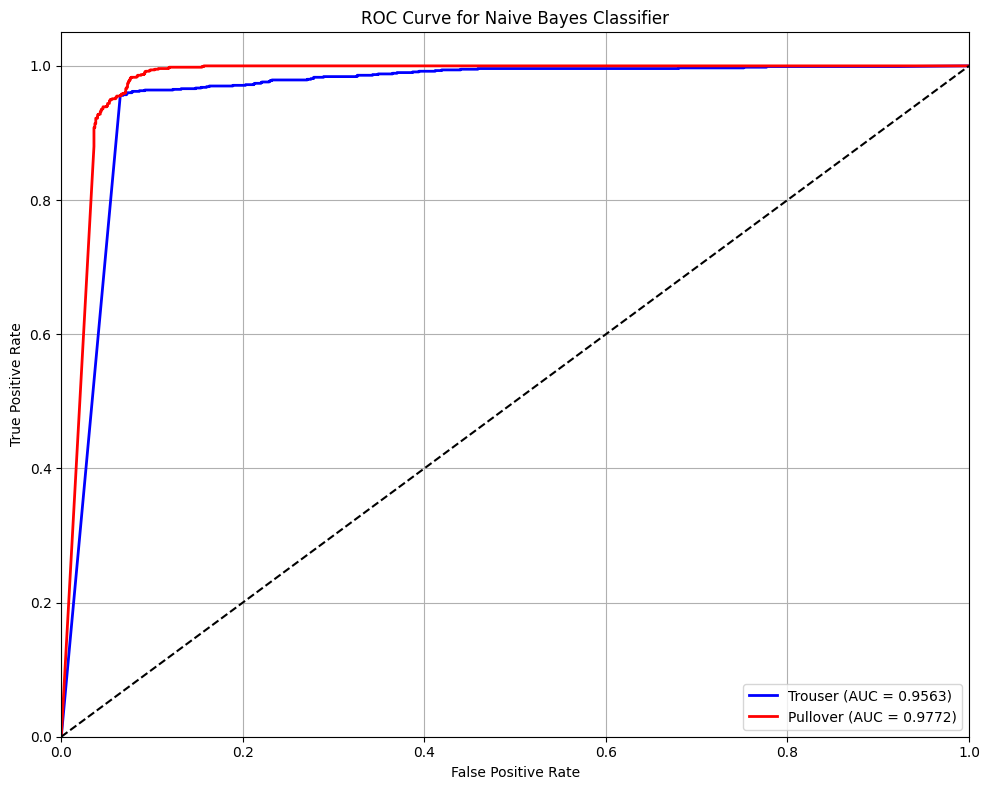

In [172]:
# Calculate ROC curves for both classes
fpr_trouser, tpr_trouser, auc_trouser = calculate_roc_curve(y_test_filtered, y_test_filtered_prob, positive_class=1)
fpr_pullover, tpr_pullover, auc_pullover = calculate_roc_curve(y_test_filtered, y_test_filtered_prob, positive_class=2)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_trouser, tpr_trouser, 'b-', linewidth=2, label=f'Trouser (AUC = {auc_trouser:.4f})')
plt.plot(fpr_pullover, tpr_pullover, 'r-', linewidth=2, label=f'Pullover (AUC = {auc_pullover:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.5)  # Diagonal line

# Set plot properties
plt.grid(True)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Classifier')
plt.legend(loc='lower right')
plt.xlim([0, 1])
plt.ylim([0, 1.05])

# Save and display the figure
plt.tight_layout()
plt.show()

# Decision Tree
Use Decision tree technique to differentiate classify samples between trouser and pullover
You should use gini index for discriminatory features and maximum tree height should be 10


In [173]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=10)

dt_classifier.fit(x_train_filtered, y_train_filtered)

DecisionTreeClassifier(max_depth=10)

In [174]:
#dt prediction
y_train_prediction_dt = dt_classifier.predict(x_train_filtered)
y_test_prediction_dt = dt_classifier.predict(x_test_filtered)
print(f'Decision Tree predictions on training data: {y_train_prediction_dt}')
print(f'Actual class values of training data: {y_train_filtered}')

print(f'Decision Tree predictions on testing data: {y_test_prediction_dt}')
print(f'Actual class values of testing data: {y_test_filtered}')

Decision Tree predictions on training data: [2 2 1 ... 1 2 1]
Actual class values of training data: [2 2 1 ... 1 2 1]
Decision Tree predictions on testing data: [2 1 1 ... 1 2 1]
Actual class values of testing data: [2 1 1 ... 1 1 1]


In [175]:
train_accuracy_dt = accuracy_score(y_train_filtered, y_train_prediction_dt)
test_accuracy_dt = accuracy_score(y_test_filtered, y_test_prediction_dt)
print(f'Decision Tree training accuracy: {train_accuracy_dt}')
print(f'Decision Tree testing accuracy: {test_accuracy_dt}')

Decision Tree training accuracy: 0.9916666666666667
Decision Tree testing accuracy: 0.972


# Comparison between DT prediction and Naive Bayes Prediction

In [177]:
# Count how many incorrect predictions the DT made for the testing data
incorrect_predictions_dt = []
for index, prediction in enumerate(y_test_prediction_dt):
    if prediction != y_test_filtered[index]:
        incorrect_predictions_dt.append({
            "Image Index": index,
            "Prediction": prediction,
            "Correct Label": y_test_filtered[index]
        })
        
incorrect_predictions_df = pd.DataFrame(incorrect_predictions_dt)
print(incorrect_predictions_df)
print(f'Number of incorrect predictions: {len(incorrect_predictions_df)}')

    Image Index  Prediction  Correct Label
0             6           1              2
1            61           1              2
2            80           1              2
3            92           1              2
4           155           1              2
5           164           1              2
6           265           1              2
7           323           1              2
8           398           2              1
9           427           1              2
10          438           1              2
11          492           2              1
12          504           2              1
13          516           1              2
14          557           2              1
15          558           2              1
16          585           1              2
17          631           2              1
18          637           1              2
19          685           2              1
20          712           1              2
21          770           2              1
22         

In [179]:
# Count how many incorrect predictions the Naive Bayes made for the testing data
incorrect_predictions_nb = []
for index, prediction in enumerate(y_test_filtered_pred):
    if prediction != y_test_filtered[index]:
        incorrect_predictions_nb.append({
            "Image Index": index,
            "Prediction": prediction,
            "Correct Label": y_test_filtered[index]
        })

incorrect_predictions_df = pd.DataFrame(incorrect_predictions_nb)
print(incorrect_predictions_df)
print(f'Number of incorrect predictions: {len(incorrect_predictions_df)}')

     Image Index  Prediction  Correct Label
0             11           1              2
1             17           1              2
2             47           2              1
3             61           1              2
4             65           1              2
..           ...         ...            ...
127         1930           2              1
128         1931           1              2
129         1962           2              1
130         1983           2              1
131         1996           1              2

[132 rows x 3 columns]
Number of incorrect predictions: 132
